# Episode 4 Data vs. MC

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import mplhep

In [2]:
path_samples='/home/marcela/Documents/Matplotlib/Kaggle/'

In [3]:
samples_list = ['ttbar_lep','llll','ggH125_ZZ4lep', 'data']

In [4]:
dic_dfsamples = {}
for s in samples_list: 
    dic_dfsamples[s] = pd.read_csv(path_samples+f'{s}.csv')

In [5]:
dic_dfsamples.keys()

dict_keys(['ttbar_lep', 'llll', 'ggH125_ZZ4lep', 'data'])

Available variables

In [6]:
dic_dfsamples['data'].columns

Index(['entry', 'lep_pt_0', 'lep_pt_1', 'lep_pt_2', 'lep_pt_3', 'lep_eta_0',
       'lep_eta_1', 'lep_eta_2', 'lep_eta_3', 'lep_phi_0', 'lep_phi_1',
       'lep_phi_2', 'lep_phi_3', 'lep_E_0', 'lep_E_1', 'lep_E_2', 'lep_E_3',
       'lep_charge_0', 'lep_charge_1', 'lep_charge_2', 'lep_charge_3',
       'lep_type_0', 'lep_type_1', 'lep_type_2', 'lep_type_3', 'lep_z0_0',
       'lep_z0_1', 'lep_z0_2', 'lep_z0_3', 'lep_sigd0_0', 'lep_sigd0_1',
       'lep_sigd0_2', 'lep_sigd0_3', 'lep_ptconerel_0', 'lep_ptconerel_1',
       'lep_ptconerel_2', 'lep_ptconerel_3', 'lep_etconerel_0',
       'lep_etconerel_1', 'lep_etconerel_2', 'lep_etconerel_3', 'min_mll',
       'mZ1', 'mZ2', 'mllll'],
      dtype='object')

very basic cuts on pt

In [7]:
for element in dic_dfsamples:
    dic_dfsamples[element]= dic_dfsamples[element].query('lep_pt_0 > 25 and lep_pt_1 > 15 and lep_pt_2 > 10 and lep_pt_3 > 7')

# MC contributions

First take a look to the MC distributions

In [8]:
mc_samples=samples_list[:3]

In [9]:
mc_samples

['ttbar_lep', 'llll', 'ggH125_ZZ4lep']

In [11]:
def stack_mc_list(var):
    stack_samples_list=[]
    for s in mc_samples:
        stack_samples_list.append(dic_dfsamples[s][var])
    return stack_samples_list

In [10]:
def plot_stacklist(stack_samples_list, range_ab, list_label, var, var_units):
    plt.figure(figsize=(10,8))
    #plt.title(var)
    h=plt.hist(stack_samples_list, range=range_ab, label=list_label, stacked=True)
    plt.ylabel('Events', fontsize=18 ,loc='top')
    plt.xlabel(var+var_units, fontsize=18,loc='right')
    #plt.yscale('log')
    plt.tick_params(which='both', # ticks on both x and y axes
                    direction='in', # Put ticks inside and outside the axes
                    top=True, # draw ticks on the top axis
                    right=True, length=6, width=1)
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)
    plt.ylim(bottom=0.01)
    plt.legend(fontsize=18,frameon=False)
    plt.show()
    plt.close()

In [12]:
var_names=[r'm$_{Z_{1}}$', r'm$_{Z_{2}}$']
units=[' [GeV]', ' [GeV]']
rangos=[[60,120],[60,120]]
variables=['mZ1', 'mZ2']

#### Notice that at this point we have jet included the weight to the histograms

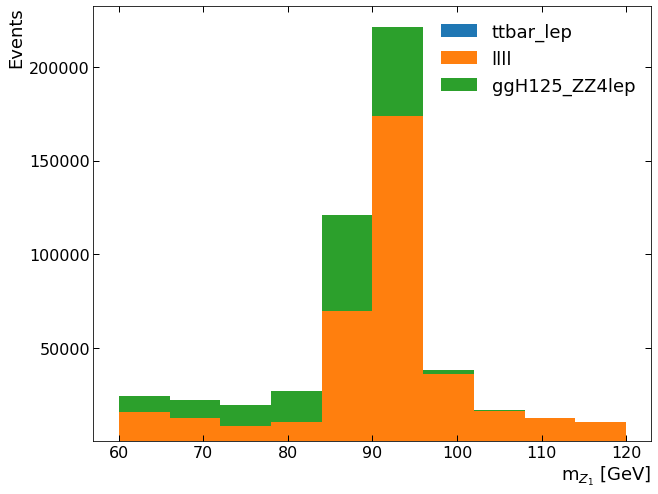

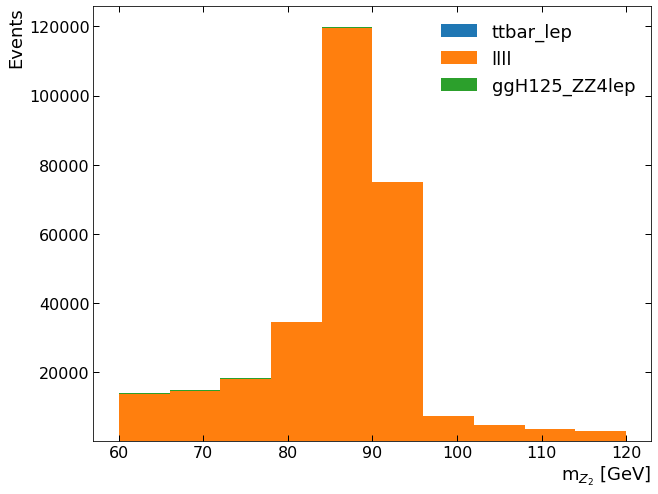

In [13]:
for i,var in enumerate(variables):
    var_samples=stack_mc_list(var)
    plot_stacklist(var_samples,rangos[i], mc_samples,var_names[i], units[i])

# Data vs. MC

#### In order to compare MC with Data the weights to the histograms need to be included

Including poisson errors for data

In [17]:
def list_var_data(var):
    data_var=dic_dfsamples['data'][var]
    return data_var

In [14]:
def plotData(data_var, range_ab, bins_samples):
    data_hist,bins = np.histogram(data_var, range=range_ab, bins=bins_samples) 
    data_hist_errors = np.sqrt( data_hist )
    bin_center=(bins[1:]+bins[:-1])/2
    h0=plt.errorbar(x=bin_center, y=data_hist, yerr=data_hist_errors,fmt='ko', label='Data')

In [16]:
def stack_weights_list():
    stack_weights_list=[]
    for s in mc_samples:
        stack_weights_list.append(dic_dfsamples[s]['totalWeight'])
    return stack_weights_list

In [15]:
def plot_data_mc(data_var,weights_stack,list_samples_to_stack, range_ab, list_label, var_name, var_units, bins_samples):
    plt.figure(figsize=(10,8))
    plt.title(var)
    #h0=plt.hist(data_var, range=range_ab, label='data',histtype='step', bins=bins_samples)
    plotData(data_var, range_ab, bins_samples)
    h1=plt.hist(list_samples_to_stack, range=range_ab, label=list_label, stacked=True, weights=weights_stack, bins=bins_samples)
    plt.ylabel('Events', fontsize=18 ,loc='top')
    plt.xlabel(var_name+var_units, fontsize=18,loc='right')
    #plt.yscale('log')
    plt.tick_params(which='both', # ticks on both x and y axes
                    direction='in', # Put ticks inside and outside the axes
                    top=True, # draw ticks on the top axis
                    right=True, length=6, width=1)
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)
    #plt.ylim(bottom=0.0001)
    plt.legend(fontsize=18,frameon=False)
    plt.show()
    plt.close()

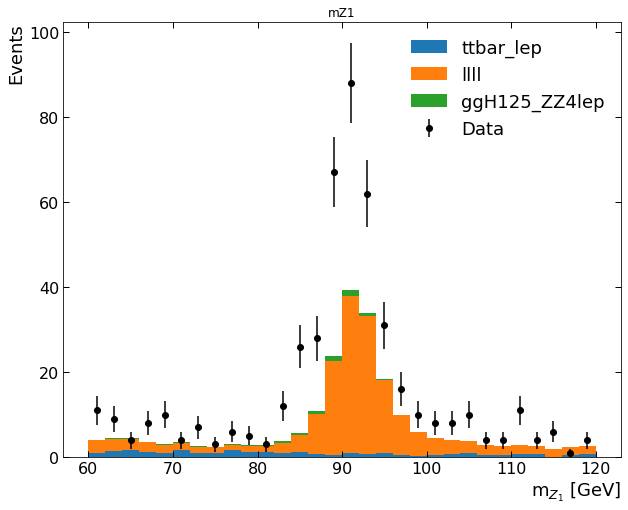

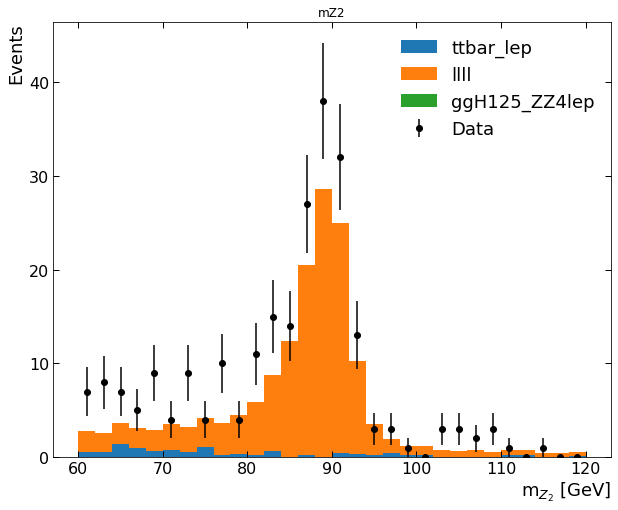

In [18]:
for i,var in enumerate(variables):
    var_samples=stack_mc_list(var)
    var_data=list_var_data(var)
    weights_list=stack_weights_list()
    plot_data_mc(var_data,weights_list,var_samples, rangos[i], mc_samples,var_names[i], units[i], 30)

832 data

# Episode 5 Higgs

In [19]:
var_names=[ 'mllll']
units=[' [GeV]']
rangos=[[80,170]]
variables=['mllll']
bines=(rangos[0][-1]-rangos[0][0])/5

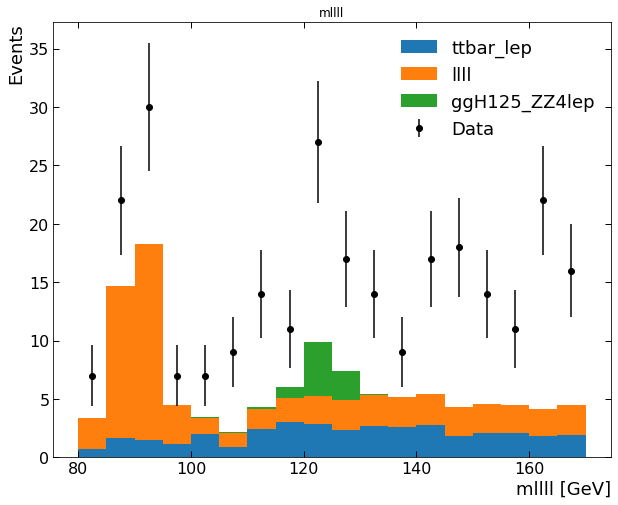

In [20]:
for i,var in enumerate(variables):
    var_samples=stack_mc_list(var)
    var_data=list_var_data(var)
    weights_list=stack_weights_list()
    plot_data_mc(var_data,weights_list,var_samples, rangos[i], mc_samples,var_names[i], units[i], int(bines))